In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import cv2
import os , glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from skimage.feature import hog ,sift ,orb
from sklearn.svm import SVC ,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import StackingClassifier ,BaseEnsemble,RandomTreesEmbedding

In [93]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
def ShowGridImage(images, labels, GSize=5, title=None):
    selectedIndex = np.random.choice(len(images), GSize*GSize)
    fig, axes = plt.subplots(GSize, GSize, figsize=(10, 10))
    
    for i, ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]

        # Add print statement to check the shape of the image
#         print(f"Image shape before reshape: {image.shape}")

        ax.imshow(image.reshape(100, 100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    
    


In [94]:
mainPath = "./Cricketer Pictures/"
classes = os.listdir(mainPath)
images = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
#         lbpFeatures.append(feature)
        images.append(img.flatten())
        
#         label.append(label)
        labels.append(classes.index(cls))

In [95]:
images = np.array(images)
labels = np.array(labels)


In [96]:
trainImages , testImages , trainLabels , testLabels = train_test_split(images, labels , train_size=0.8, random_state=0)

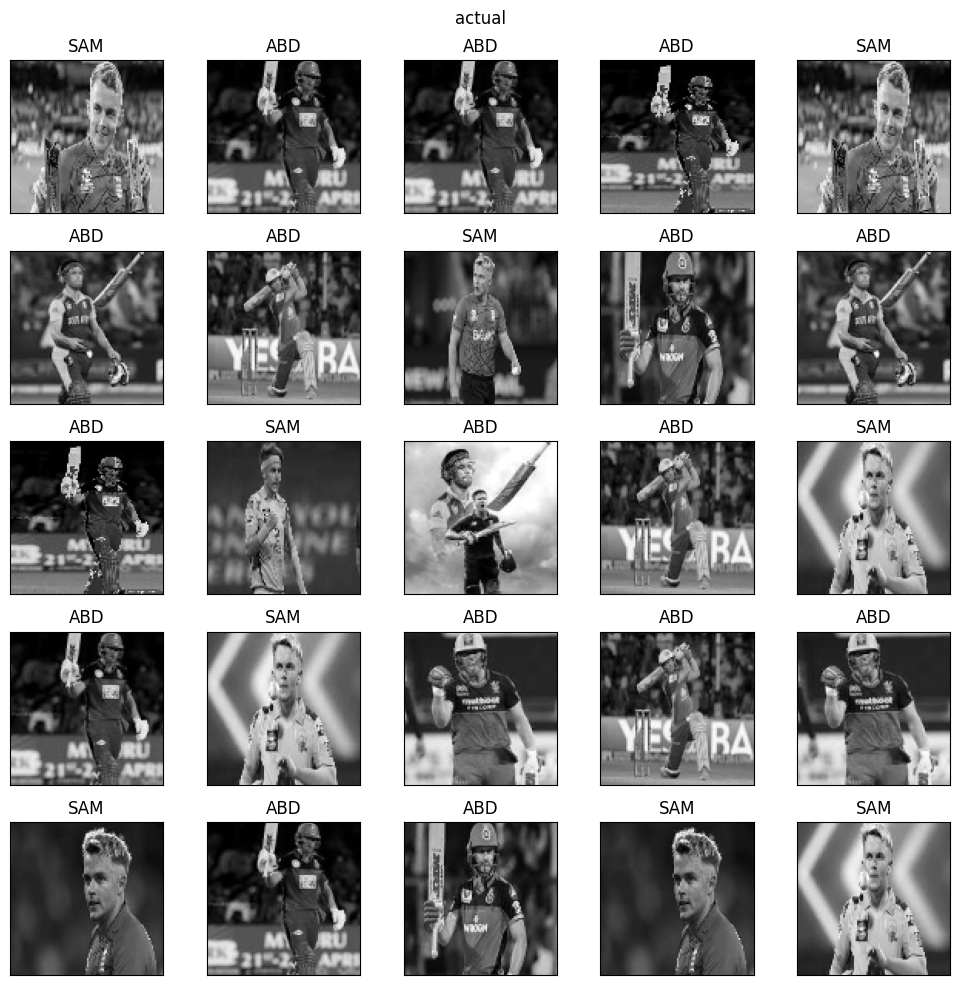

In [97]:
ShowGridImage(images , labels , 5 ,"actual")

In [98]:
LR =LogisticRegression()

In [99]:
LR.fit(trainImages , trainLabels)

LogisticRegression()

In [100]:
LR_preds = LR.predict(testImages)

In [101]:
accuracy_score(testLabels, LR_preds)

0.25

In [102]:
# ShowGridImage(testLabels, LR_preds, 5 , "Predicted")

In [103]:
import pickle 

In [104]:
with open("LogisticRegression.pkl",'wb' )as file:
    pickle.dump(LR , file)

In [105]:
LR = LogisticRegression()
svm = SVC(kernel="linear", random_state=0)

# RF = RandomForestClassifier(n_estimators=100, random_state=0)

adaboost_lr = AdaBoostClassifier(base_estimator=LR, algorithm='SAMME',n_estimators=50, random_state=0)
adaboost_svm = AdaBoostClassifier(base_estimator=svm,algorithm='SAMME', n_estimators=50, random_state=0)
# adaboost_dt = AdaBoostClassifier(base_estimator=DT,algorithm='SAMME', n_estimators=50, random_state=0)
# adaboost_rf = AdaBoostClassifier(base_estimator=RF,algorithm='SAMME', n_estimators=50, random_state=0)

voting_classifier = VotingClassifier(
    estimators=[
        ('adaboost_lr', adaboost_lr),
#         ('adaboost_dt', adaboost_dt),
        ('adaboost_rf', adaboost_svm)
    ],
    voting='soft'  # Use 'hard' or 'soft' based on your requirements
)

In [106]:
voting_classifier.fit(trainImages, trainLabels)
y_pred = voting_classifier.predict(testImages)
accuracy = accuracy_score(testLabels, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 25.00


E:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [107]:
with open("Voting_Classifier.pkl",'wb')as file:
    pickle.dump(voting_classifier, file)

In [108]:
SVM = SVC()

In [109]:

SVM.fit(trainImages,trainLabels)


SVC()

In [110]:
SVM_preds = SVM.predict(testImages)

In [111]:
accuracy_score(testLabels,SVM_preds)

0.5

In [112]:
with open("SVM.pkl",'wb')as file:
    pickle.dump(SVM, file)

In [113]:
# now I should train my model on feature of an image

In [114]:
ABC = AdaBoostClassifier()

In [115]:
ABC.fit(trainImages, trainLabels)

AdaBoostClassifier()

In [116]:
ABC_preds = ABC.predict(testImages)

In [117]:
accuracy_score(testLabels, ABC_preds)

0.5

In [118]:
with open("ABC.pkl",'wb')as file:
    pickle.dump(ABC, file)

In [119]:
DecisionTree = DecisionTreeClassifier()

In [120]:
DecisionTree.fit(trainImages, trainLabels)

DecisionTreeClassifier()

In [121]:
DT_preds = DecisionTree.predict(testImages)

In [122]:
accuracy_score(testLabels, DT_preds)

0.75

In [123]:
with open("DecisionTree.pkl",'wb')as file:
    pickle.dump(DecisionTree, file)

In [124]:
RandomForest = RandomForestClassifier()

In [125]:
RandomForest.fit(trainImages, trainLabels)

RandomForestClassifier()

In [126]:
RF_preds = RandomForest.predict(testImages)

In [127]:
accuracy_score(testLabels, RF_preds)

0.5

In [128]:
with open("RandomForest.pkl",'wb')as file:
    pickle.dump(RandomForest, file)

In [129]:
GBC = GradientBoostingClassifier()

In [130]:
GBC.fit(trainImages, trainLabels)

GradientBoostingClassifier()

In [131]:
GBC_preds = GBC.predict(testImages)

In [132]:
accuracy_score(testLabels, GBC_preds)

0.75

In [133]:
with open("GBC.pkl",'wb')as file:
    pickle.dump(GBC, file)

ValueError: cannot reshape array of size 1 into shape (100,100)

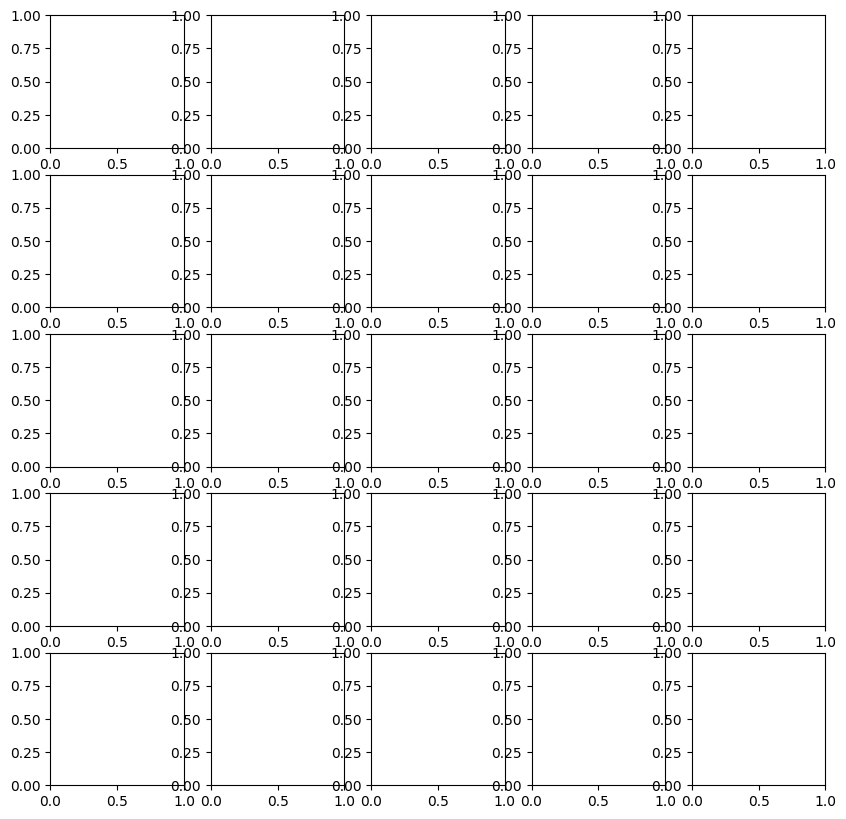

In [134]:
ShowGridImage(testLabels, GBC_preds, 5)

In [ ]:
# now move to train the model on feature extraction 

In [135]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    

def showGridImage (images , labels , GSize = 5 , title = None):
    selectedIndex = np.random.choice(len(images), GSize*GSize , replace = False)
    fig , axes = plt.subplots(GSize , GSize, figsize = (10 , 10))
    for i , ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [136]:
mainPath = "./Cricketer Pictures/"
classes = os.listdir(mainPath)

lbpFeatures = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
        feature = LBP(img,3,1)  # 3 means the size of windows , 1 matching or comparison with centre value
#         lbpFeatures.append(feature)
        lbpFeatures.append(feature.flatten())
#         label.append(label)
        labels.append(classes.index(cls))


In [137]:
image = np.array(images)
label = np.array(labels)


In [138]:
trainImages , testImages , trainLabels, testLabels = train_test_split(lbpFeatures , labels , train_size=0.8 , random_state=0)

In [139]:
model = SVC()


In [140]:
model.fit(trainImages, trainLabels)

SVC()

In [141]:
preds = model.predict(testImages)

In [142]:
accuracy_score(testLabels, preds)

0.5

In [143]:
mainPath = "./Cricketer Pictures/"
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
        feature , hogImg = hog(img,visualize=True)  # 3 means the size of windows , 1 matching or comparison with centre value
#         lbpFeatures.append(feature)
        hogFeatures.append(feature.flatten())
#         label.append(label)
        labels.append(classes.index(cls))
        hogImages.append(hogImg)

In [144]:
LR = LogisticRegression()

In [145]:
hogFeatTrain , hogFeatTest , trainLabels, testLabels = train_test_split(hogFeatures, labels , train_size=0.8 , random_state=0)
hogImagesTrain , hogImagesTest ,_,_ = train_test_split(hogImages, labels , train_size=0.8 , random_state=0)

In [146]:
LR.fit(hogFeatTrain, trainLabels)

LogisticRegression()

In [147]:
Preds_LR= LR.predict(hogFeatTest)

In [150]:
accuracy_score(testLabels, Preds_LR)

0.75

In [151]:
# showGridImage(hogImagesTest, preds, 5, 'HogPredictedClasses')

ValueError: Cannot take a larger sample than population when 'replace=False'

In [152]:
with open("LBP.pkl", 'wb') as file:
    pickle.dump(model , file)

In [154]:
with open("HOG.pkl", 'wb') as file:
    pickle.dump(model , file)